In [1]:
import xarray as xr
import pyorc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pyproj import Transformer

In [2]:
video_file = R"..\..\res\pont-cour.mp4"

Scanning video: 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]


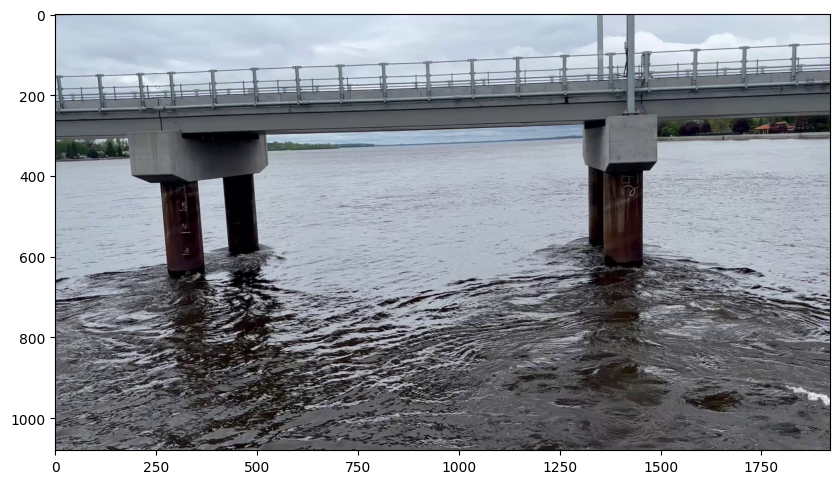

In [3]:
videofilm = pyorc.Video(video_file, start_frame=0, end_frame=1)
frame = videofilm.get_frame(0, method="rgb")

# plot frame on a notebook-style window
f = plt.figure(figsize=(10, 6))
plt.imshow(frame)

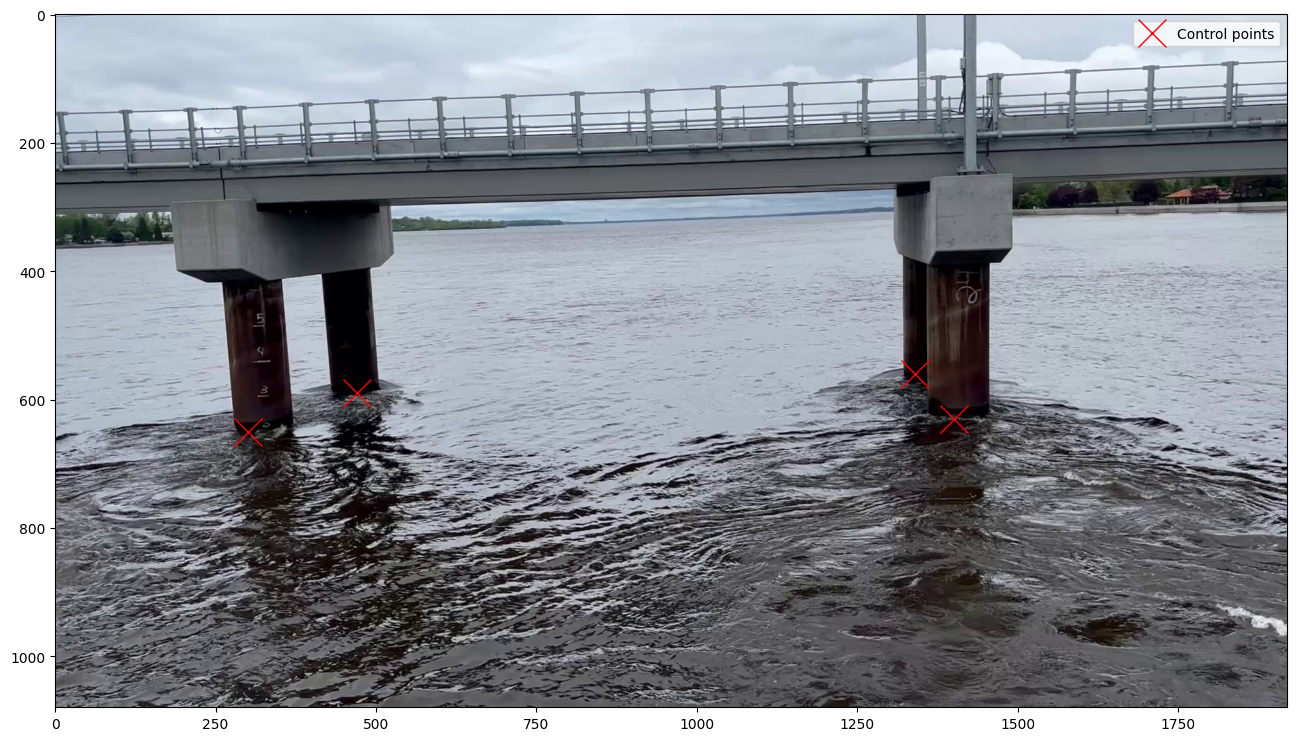

In [4]:
gcps = dict(
    src=[
        [1400, 630], # pixel bas droite     
        [1340, 560],# pixel haut droite
        [470, 590], # haut gauche
        [300, 650], # bas gauche
    ]
)

f = plt.figure(figsize=(16, 9))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.legend()

In [5]:
pointDST =  [                              
    (-73.88192139635325, 45.532319201834326), #bas droit 
    (-73.88200665935436, 45.532274559512864), #haut droit 
    ( -73.8818635145485 ,45.53213127048126),  #haut gauche 
    (-73.8817706075192, 45.532179124996894) #bas gauche

]

transformer = Transformer.from_crs("epsg:4326", "epsg:32618", always_xy=True)

gcps["dst"] = [transformer.transform(lon, lat) for lon, lat in pointDST]

# # if we would use this video as survey in video, the lines below are also needed,
# # and proper values need to be filled in. They are now commented out.
# gcps["h_ref"] = <your locally measured water level during survey in>
#gcps["z_0"] = 1182.2
gcps["z_0"] = 34.5

# set the height and width
height, width = frame.shape[0:2]

# now we use everything to make a camera configuration
cam_config = pyorc.CameraConfig(height=height, width=width, gcps=gcps, crs=32618)

<GeoAxes: >

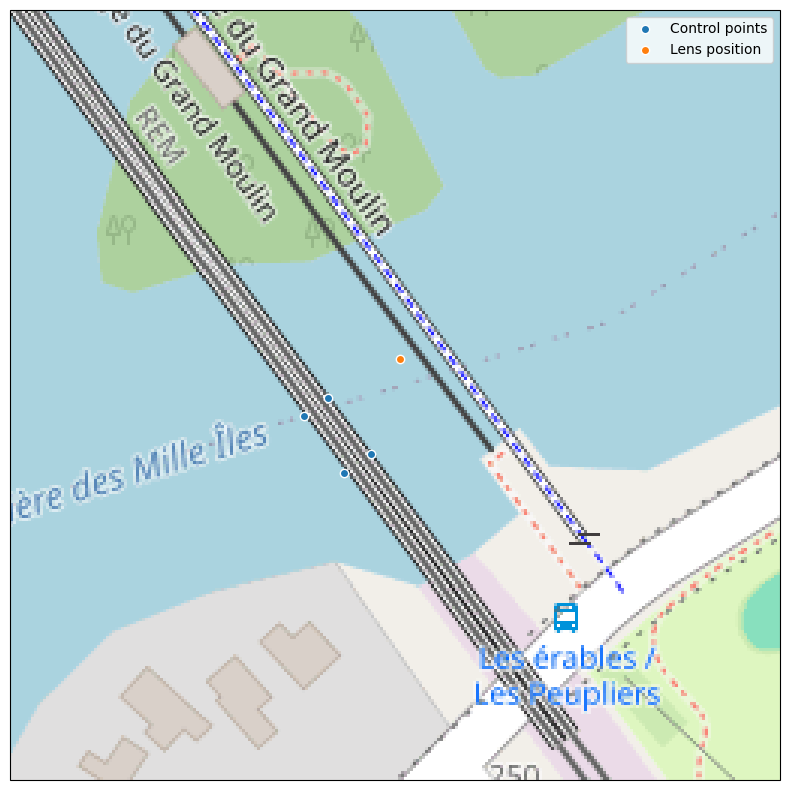

In [6]:
import cartopy.io.img_tiles as cimgt
osm_tiler = cimgt.OSM()
tiler_crs = osm_tiler.crs

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=tiler_crs)

# Ajouter les tuiles
ax.add_image(osm_tiler, 17)  # Zoom 17 (modifie selon ton besoin)

# Ajouter ensuite des éléments de pyOpenRiverCam sur ce même ax
cam_config.plot(ax=ax, mode="geographical")

In [7]:
corners = [
    [1500, 900],   # plus à droite et en bas
    [1380, 600],   # plus à droite et en haut
    [400, 600],    # plus à gauche et en haut
    [250, 900]     # plus à gauche et en bas
]
cam_config.set_bbox_from_corners(corners)
cam_config.resolution = 0.05
cam_config.window_size = 64

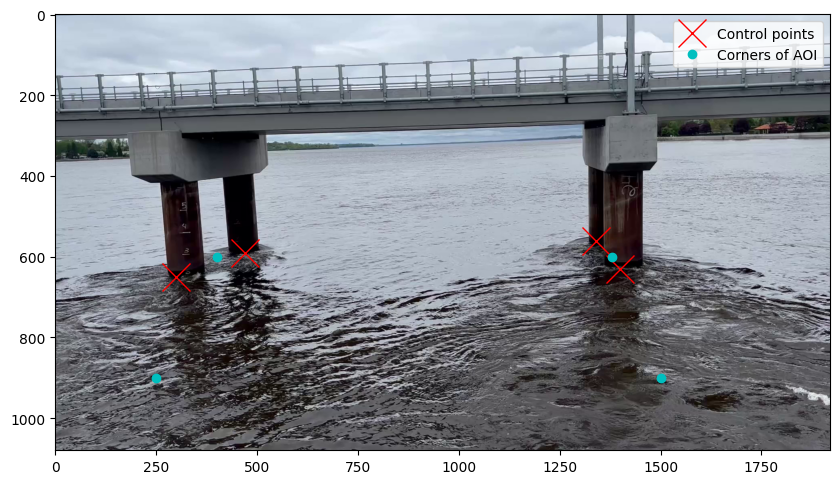

In [8]:
f = plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.plot(*zip(*gcps["src"]), "rx", markersize=20, label="Control points")
plt.plot(*zip(*corners), "co", label="Corners of AOI")
plt.legend()

C:\Users\willi\AppData\Local\Temp\ipykernel_29556\1665791959.py:16: DeprecationWarning: The camera=True option is deprecated, use mode='camera' instead. This option will be removed in a future release.
  cam_config.plot(ax=ax2, camera=True)


<Axes: xlabel='column [-]', ylabel='row [-]'>

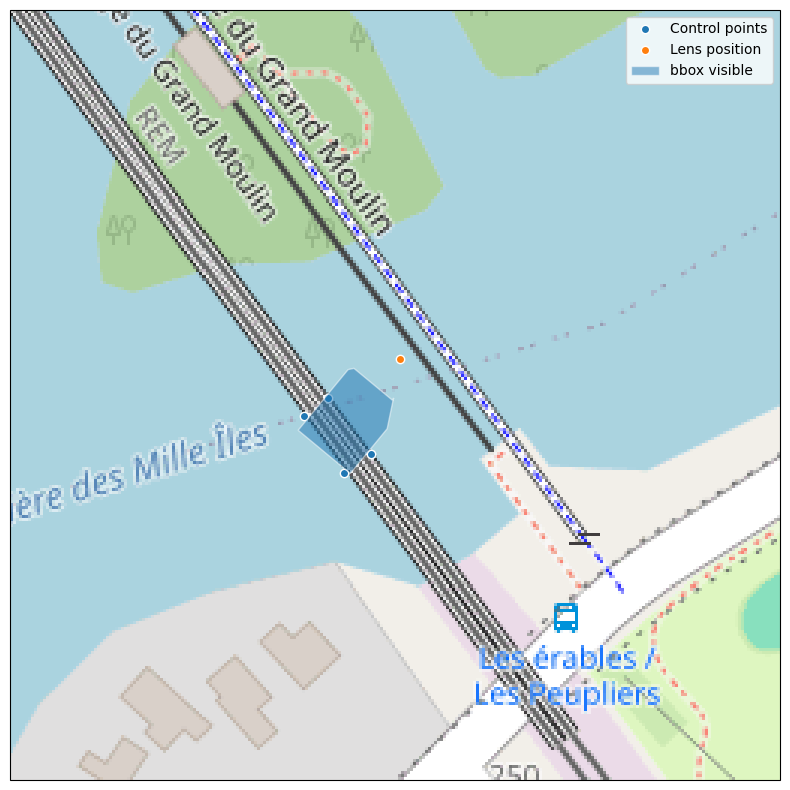

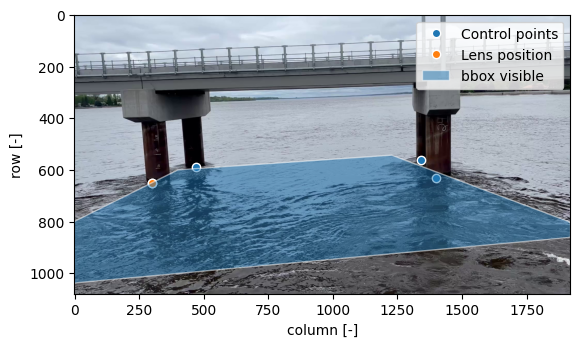

In [9]:
osm_tiler = cimgt.OSM()
tiler_crs = osm_tiler.crs

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=tiler_crs)

# Ajouter les tuiles
ax.add_image(osm_tiler, 17)  # Zoom 17 (modifie selon ton besoin)

# Ajouter ensuite des éléments de pyOpenRiverCam sur ce même ax
cam_config.plot(ax=ax, mode="geographical")

f = plt.figure()
ax2 = plt.axes()
ax2.imshow(frame)
cam_config.plot(ax=ax2, camera=True)

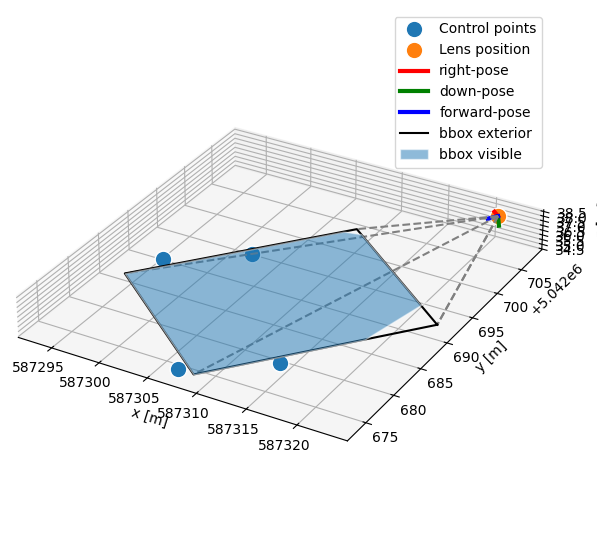

In [10]:
plt.close("all")
f = plt.figure(figsize=(12, 7))
ax = f.add_subplot(projection="3d")
cam_config.plot(mode="3d", ax=ax)
ax.set_aspect("equal")

In [11]:
cam_config.to_file("./artifact/configCam.json")